##### **Libraraies**

In [38]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, make_scorer

import joblib

import warnings
warnings.filterwarnings("ignore")

scaler = MinMaxScaler()
encoder = LabelEncoder()

##### **Load dataset**

In [3]:
df = pd.read_csv(r"C:\Users\Admin\OneDrive - United States International University (USIU)\Documents\USIU_A\FS2025\DSA3020VA\Crop\data\Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


#### **Overview**

In [4]:
print(df.info())
print(df.describe())
print(df['label'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    

##### **Check missing values**

In [5]:
print(df.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


##### **Rename Column Names**


In [12]:
df.rename(columns = {"N":"Nitrogen", "P":"Phosphorous","K":"Potassium"}, inplace  = True)
df.columns

Index(['Nitrogen', 'Phosphorous', 'Potassium', 'temperature', 'humidity', 'ph',
       'rainfall', 'label'],
      dtype='object')

#### **EDA**

- **Check for Class Balance - The "Imbalance" Problem**

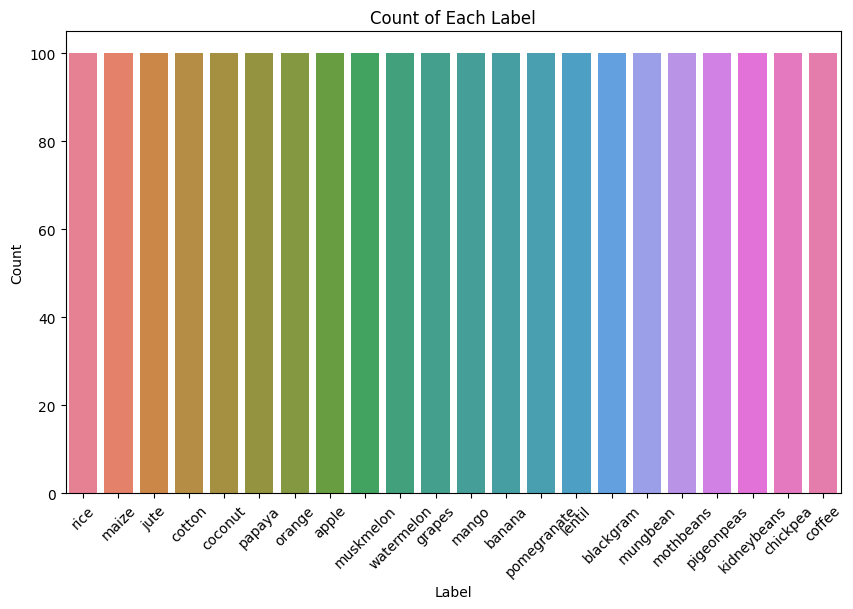

In [13]:
plt.figure(figsize=(10,6))

# Get the counts
counts = df["label"].value_counts()

# Create the bar plot
sns.barplot(x=counts.index, y=counts.values, hue=counts.index, legend=False)

plt.title("Count of Each Label")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=45) # Rotates the labels so they don't overlap
plt.show()

- The data is balanced , every labels are equal in count/ target variable evenly distributed.
- If it was not balanced techniques like SMOTE (Synthetic Minority Over-sampling Technique), adjust class weights, or use Stratified K-Fold splitting to ensure every fold has a mix of classes.


- **Multicollinearity (Feature Correlation)- Correlation Heatmap**

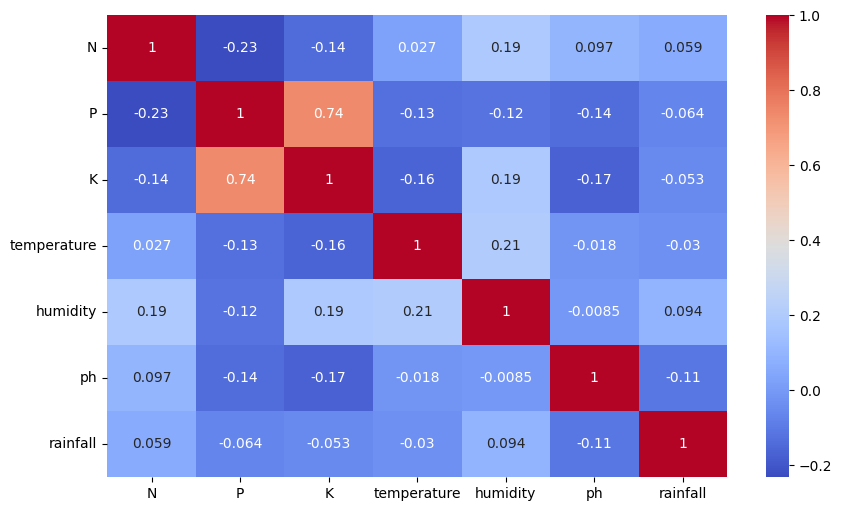

In [8]:
plt.figure(figsize=(10,6))

# Add numeric_only=True here
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")

plt.show()

In [ ]:
plt.bar(
    df["Phosphorous"].value_counts().index, df["Phosphorous"].value_counts().values,
    color = "orange",
    width = 0.5,
    align = "center",
    edgecolor = "black",
    zorder = 3
)

plt.title("Bar plot of Phosphorous", fontsize = 20, color = "black", loc = "center", fontweight = "bold")
plt.xlabel("Phosphorous Content", fontweight = "bold", fontsize = 16)
plt.ylabel("Count", fontweight = "bold", fontsize = 16)
plt.xticks(fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12, rotation = 0)
plt.xlim()
plt.tight_layout()
plt.show()

[]

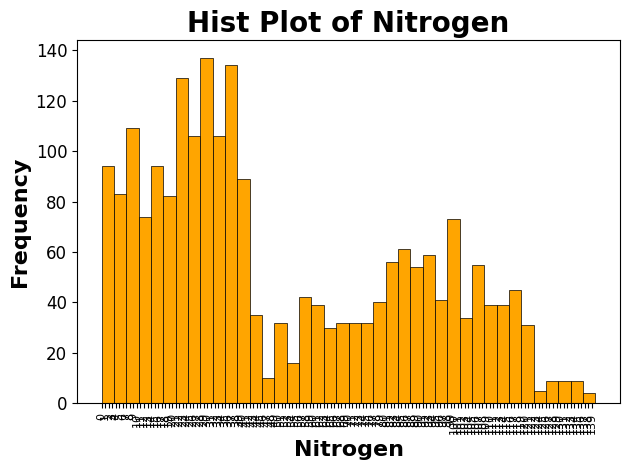

In [16]:
plt.hist(
    df["Nitrogen"],
    bins = 40,
    align = "mid",
    orientation = "vertical",
    color = "orange",
    edgecolor = "black",
    linewidth = 0.5
)
plt.title("Hist Plot of Nitrogen", fontsize = 20, fontweight = "bold", loc = "center", color = "black")
plt.xlabel("Nitrogen", fontsize = 16, fontweight = "bold", color = "black")
plt.ylabel("Frequency", fontsize = 16, fontweight = "bold", color = "black")
plt.xticks([x for x in range(df["Nitrogen"].min(), df["Nitrogen"].max())],rotation = 90, fontsize = 8)
plt.yticks(rotation = 0, fontsize = 12)
plt.tight_layout()
plt.plot()

[]

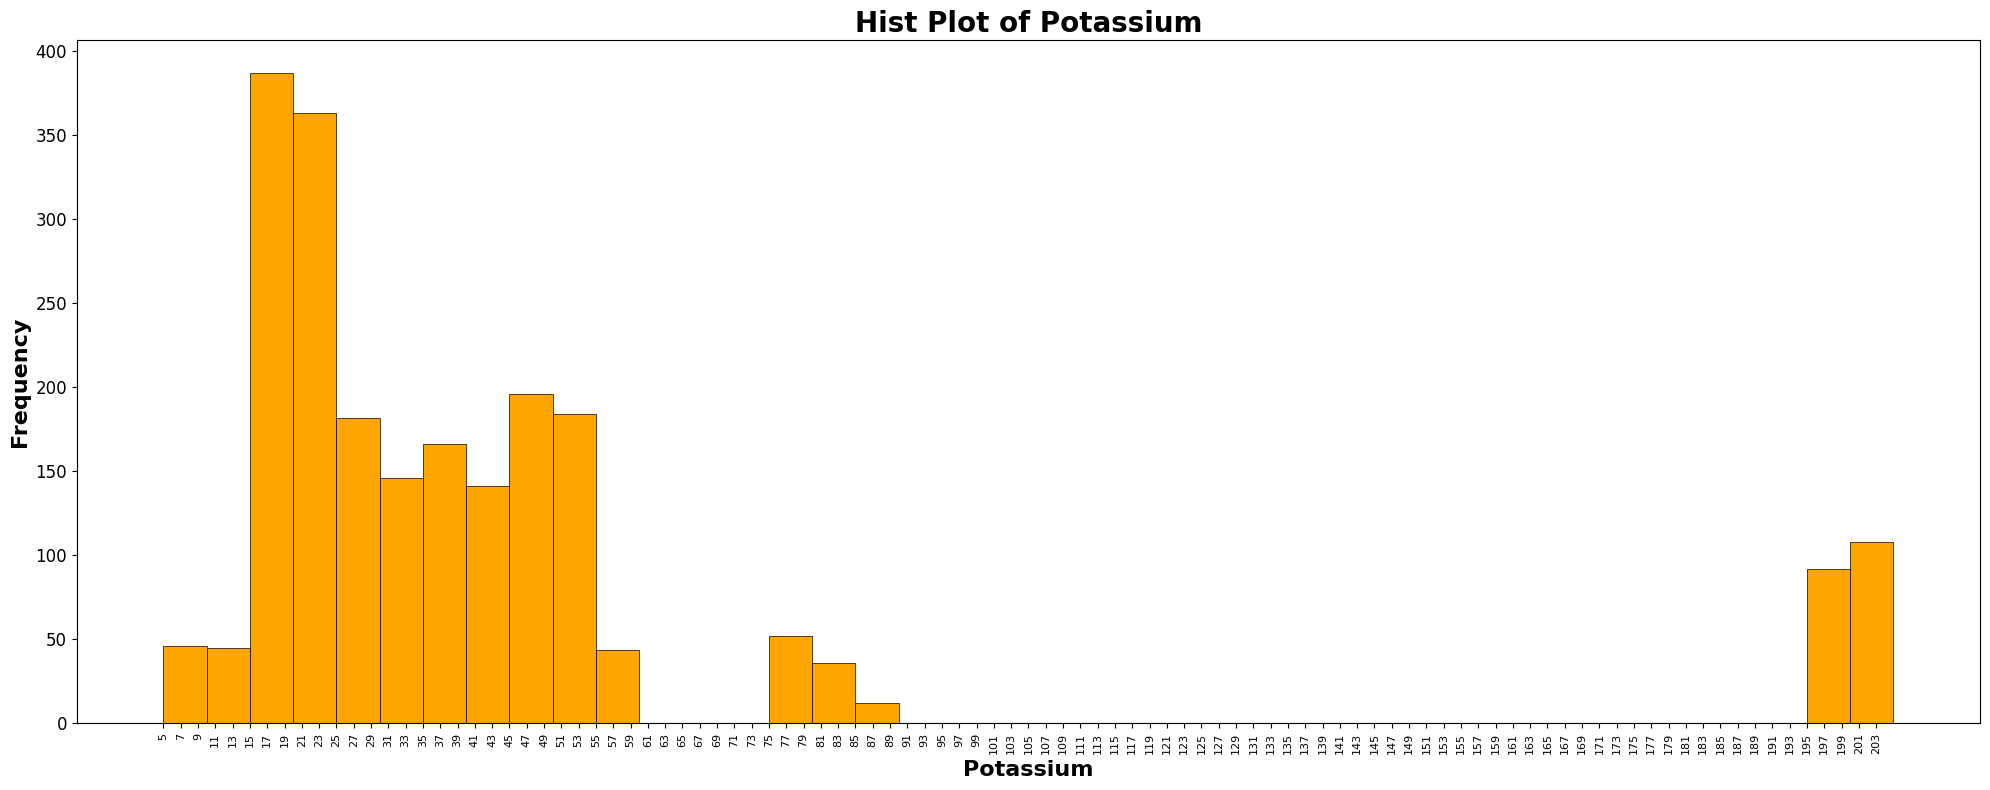

In [18]:
plt.figure(figsize = (20, 8), dpi = 100, facecolor = "white", edgecolor = "black")
plt.hist(
    df["Potassium"],
    bins = 40,
    align = "mid",
    orientation = "vertical",
    color = "orange",
    edgecolor = "black",
    linewidth = 0.5
)
plt.title("Hist Plot of Potassium", fontsize = 20, fontweight = "bold", loc = "center", color = "black")
plt.xlabel("Potassium", fontsize = 16, fontweight = "bold", color = "black")
plt.ylabel("Frequency", fontsize = 16, fontweight = "bold", color = "black")
plt.xticks([x for x in range(df["Potassium"].min(), df["Potassium"].max(),2)],rotation = 90, fontsize = 8)
plt.yticks(rotation = 0, fontsize = 12)
plt.tight_layout()
plt.plot()

[]

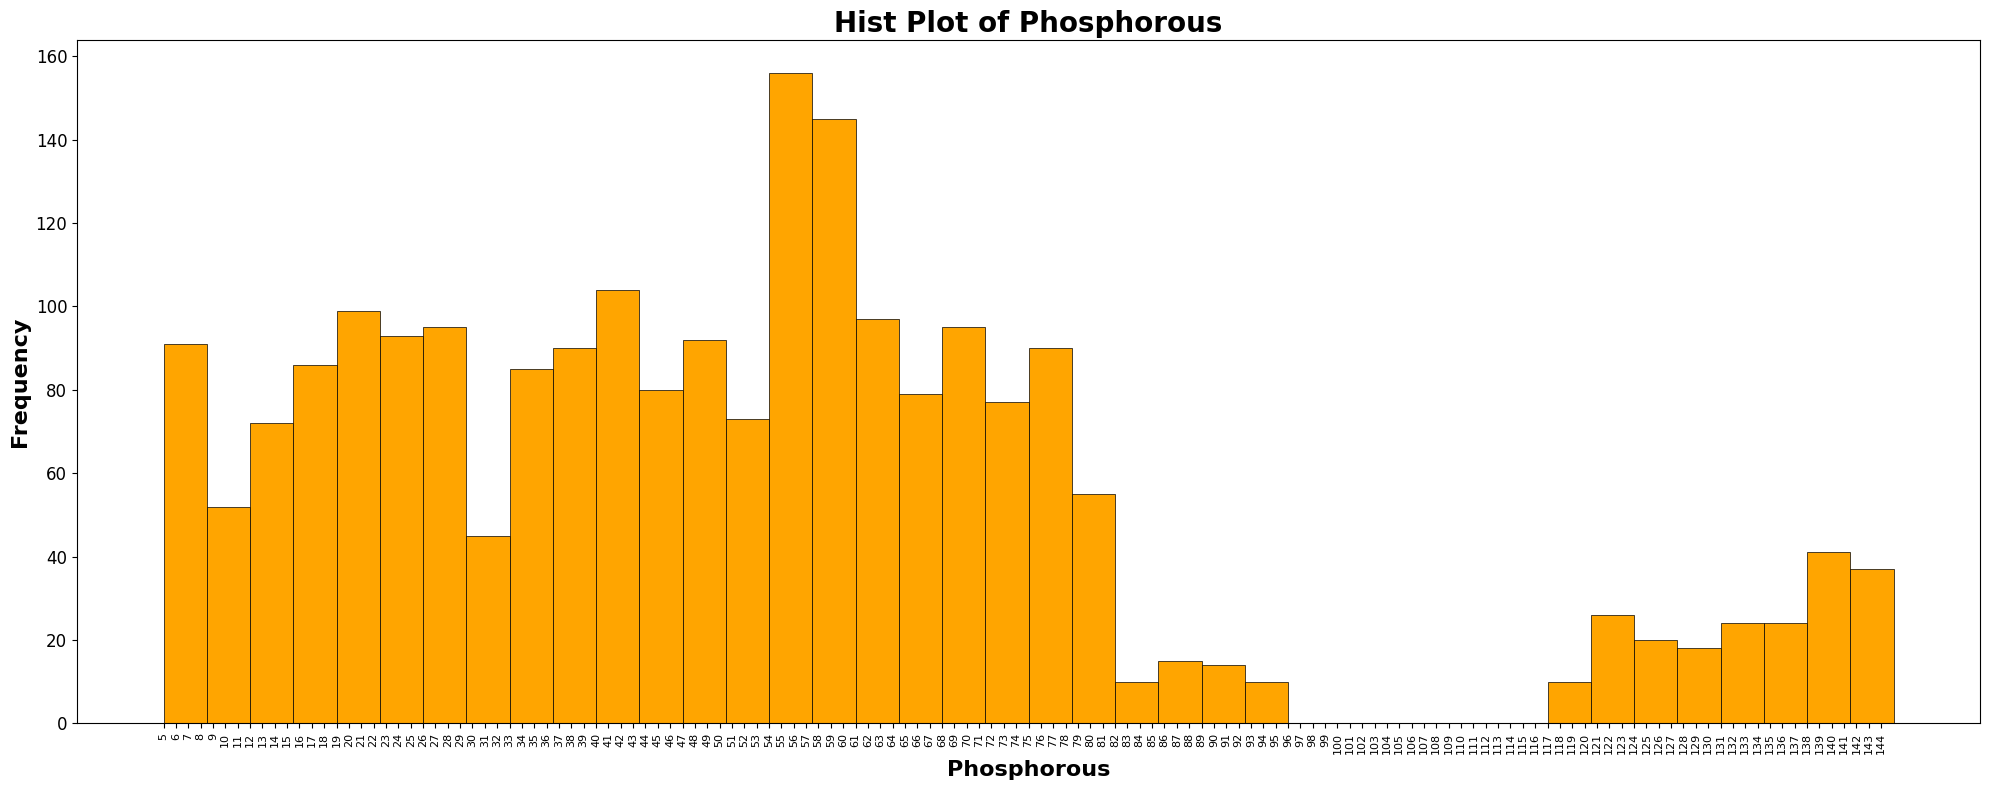

In [19]:
plt.figure(figsize = (20, 8), dpi = 100, facecolor = "white", edgecolor = "black")
plt.hist(
    df["Phosphorous"],
    bins = 40,
    align = "mid",
    orientation = "vertical",
    color = "orange",
    edgecolor = "black",
    linewidth = 0.5
)
plt.title("Hist Plot of Phosphorous", fontsize = 20, fontweight = "bold", loc = "center", color = "black")
plt.xlabel("Phosphorous", fontsize = 16, fontweight = "bold", color = "black")
plt.ylabel("Frequency", fontsize = 16, fontweight = "bold", color = "black")
plt.xticks([x for x in range(df["Phosphorous"].min(), df["Phosphorous"].max())],rotation = 90, fontsize = 8)
plt.yticks(rotation = 0, fontsize = 12)
plt.tight_layout()
plt.plot()

[]

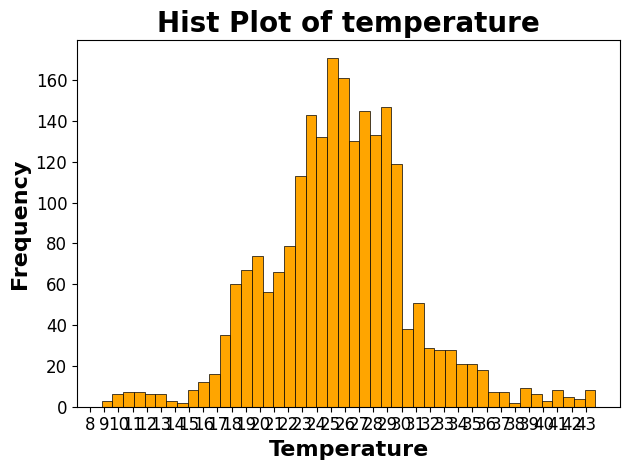

In [23]:
plt.hist(
    df["temperature"],
    bins = int(np.sqrt(df["temperature"].nunique())),
    align = "mid",
    orientation = "vertical",
    color = "orange",
    edgecolor = "black",
    linewidth = 0.5
)
plt.title("Hist Plot of temperature", fontsize = 20, fontweight = "bold", loc = "center", color = "black")
plt.xlabel("Temperature", fontsize = 16, fontweight = "bold", color = "black")
plt.ylabel("Frequency", fontsize = 16, fontweight = "bold", color = "black")
plt.xticks([x for x in range(int(df["temperature"].min()), int(df["temperature"].max()) + 1)],rotation = 0, fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12)
plt.tight_layout()
plt.plot()

[]

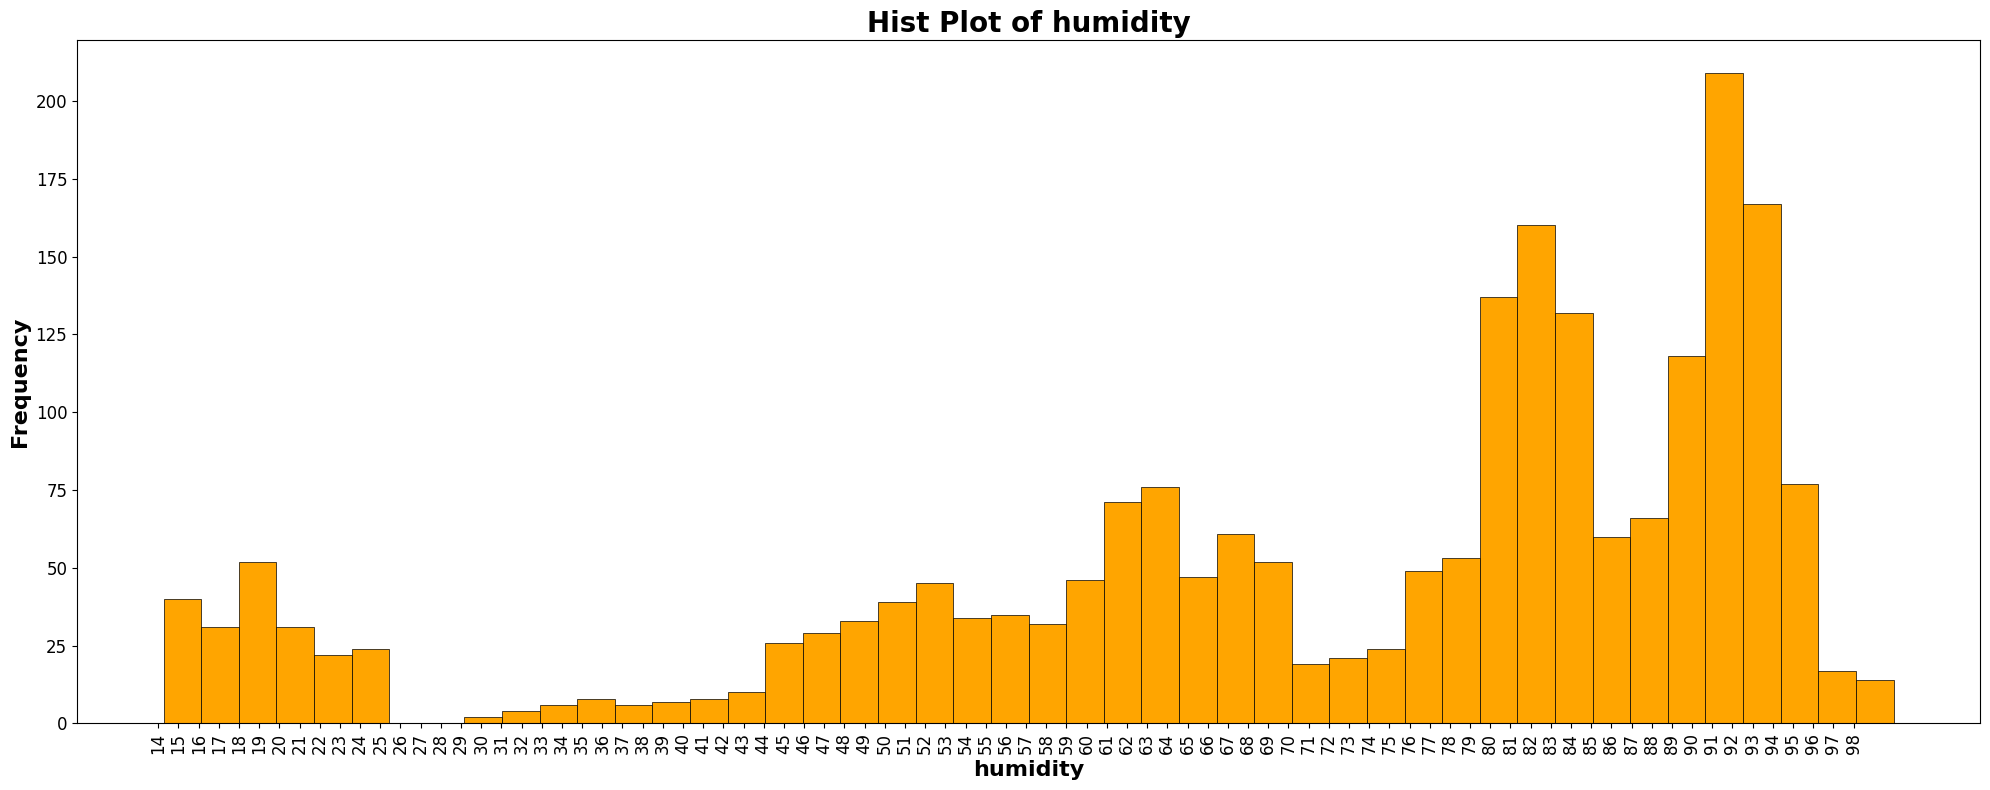

In [24]:
plt.figure(figsize = (20, 8), dpi = 100, facecolor = "white", edgecolor = "black")
plt.hist(
    df["humidity"],
    bins = int(np.sqrt(df["humidity"].nunique())),
    align = "mid",
    orientation = "vertical",
    color = "orange",
    edgecolor = "black",
    linewidth = 0.5
)
plt.title("Hist Plot of humidity", fontsize = 20, fontweight = "bold", loc = "center", color = "black")
plt.xlabel("humidity", fontsize = 16, fontweight = "bold", color = "black")
plt.ylabel("Frequency", fontsize = 16, fontweight = "bold", color = "black")
plt.xticks([x for x in range(int(df["humidity"].min()), int(df["humidity"].max()))],rotation = 90, fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12)
plt.tight_layout()
plt.plot()

[]

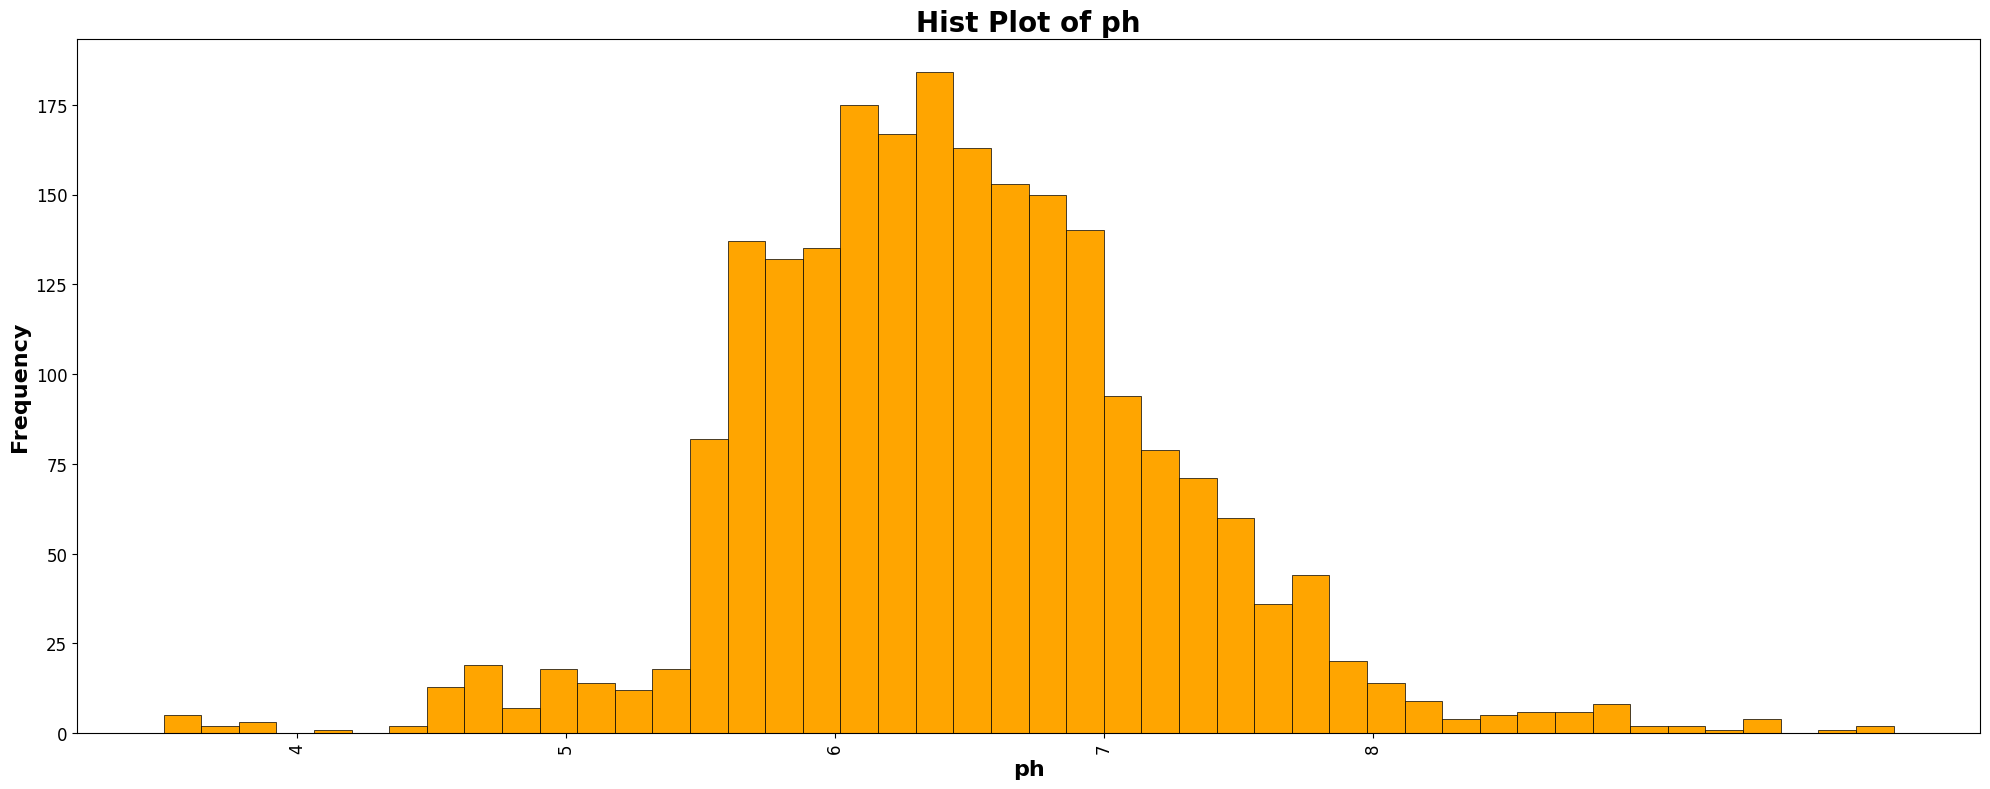

In [25]:
plt.figure(figsize = (20, 8), dpi = 100, facecolor = "white", edgecolor = "black")
plt.hist(
    df["ph"],
    bins = int(np.sqrt(df["ph"].nunique())),
    align = "mid",
    orientation = "vertical",
    color = "orange",
    edgecolor = "black",
    linewidth = 0.5
)
plt.title("Hist Plot of ph", fontsize = 20, fontweight = "bold", loc = "center", color = "black")
plt.xlabel("ph", fontsize = 16, fontweight = "bold", color = "black")
plt.ylabel("Frequency", fontsize = 16, fontweight = "bold", color = "black")
plt.xticks([x for x in range(int(df["ph"].min()), int(df["ph"].max()))],rotation = 90, fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12)
plt.tight_layout()
plt.plot()

[]

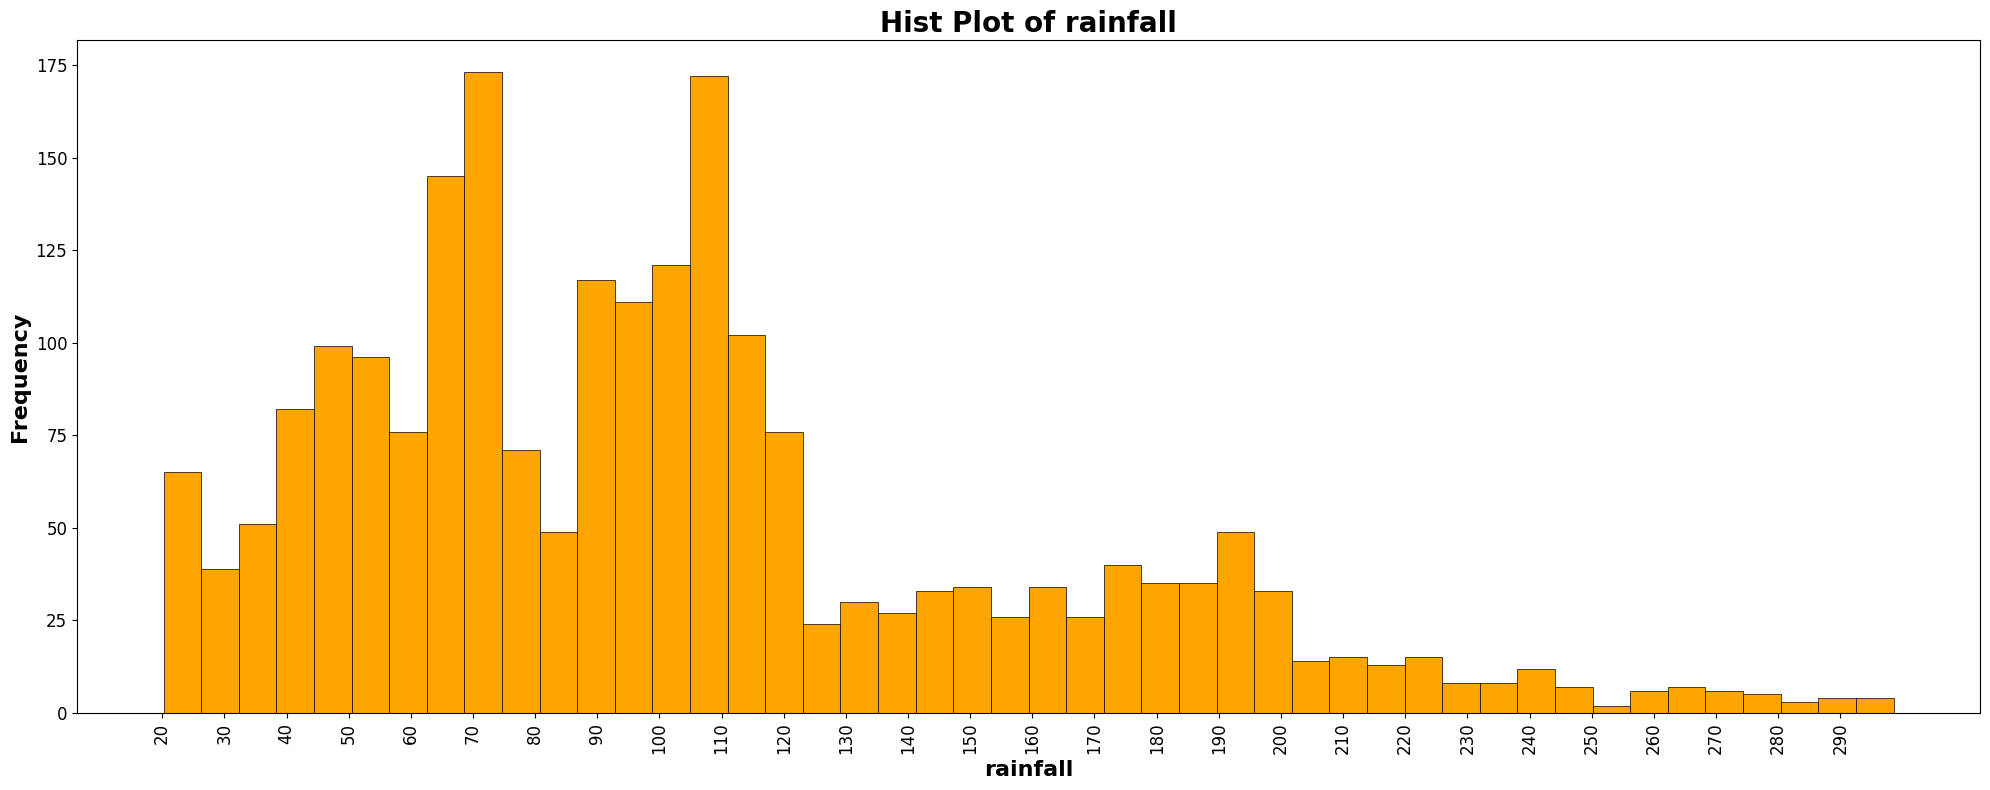

In [26]:
plt.figure(figsize = (20, 8), dpi = 100, facecolor = "white", edgecolor = "black")
plt.hist(
    df["rainfall"],
    bins = int(np.sqrt(df["ph"].nunique())),
    align = "mid",
    orientation = "vertical",
    color = "orange",
    edgecolor = "black",
    linewidth = 0.5
)
plt.title("Hist Plot of rainfall", fontsize = 20, fontweight = "bold", loc = "center", color = "black")
plt.xlabel("rainfall", fontsize = 16, fontweight = "bold", color = "black")
plt.ylabel("Frequency", fontsize = 16, fontweight = "bold", color = "black")
plt.xticks([x for x in range(int(df["rainfall"].min()), int(df["rainfall"].max()), 10)],rotation = 90, fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12)
plt.tight_layout()
plt.plot()

##### **Bivariate Analysis**

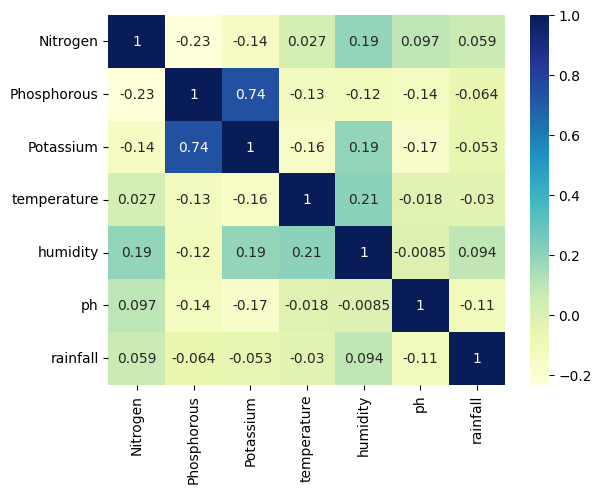

In [27]:
df_new = df.drop(columns = "label")

sns.heatmap(df_new.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [28]:
for column in df_new.columns.tolist():
    print(f"\nlabel with {column}\n")
    display(df.groupby("label")[column].describe().reset_index())


label with Nitrogen



,label,count,mean,std,min,25%,50%,75%,max
0,apple,100.0,20.80,11.863704,0.0,10.00,24.0,30.00,40.0
1,banana,100.0,100.23,11.107241,80.0,92.00,100.5,108.25,120.0
2,blackgram,100.0,40.02,12.664258,20.0,28.75,41.0,52.00,60.0
3,chickpea,100.0,40.09,12.150649,20.0,30.00,39.0,52.00,60.0
4,coconut,100.0,21.98,11.761931,0.0,13.75,24.0,31.00,40.0
5,coffee,100.0,101.20,12.345203,80.0,89.00,103.0,112.00,120.0
6,cotton,100.0,117.77,11.628817,100.0,107.75,117.0,127.50,140.0
7,grapes,100.0,23.18,12.466829,0.0,11.75,24.0,35.00,40.0
8,jute,100.0,78.40,10.968274,60.0,70.00,78.0,88.25,100.0
9,kidneybeans,100.0,20.75,10.834266,0.0,11.75,22.0,28.00,40.0



label with Phosphorous



,label,count,mean,std,min,25%,50%,75%,max
0,apple,100.0,134.22,8.139665,120.0,126.75,136.5,141.00,145.0
1,banana,100.0,82.01,7.690339,70.0,75.00,81.0,88.00,95.0
2,blackgram,100.0,67.47,7.151259,55.0,62.00,67.0,74.00,80.0
3,chickpea,100.0,67.79,7.498545,55.0,61.00,68.0,74.00,80.0
4,coconut,100.0,16.93,8.357244,5.0,9.75,15.5,24.25,30.0
5,coffee,100.0,28.74,7.276113,15.0,23.00,29.0,34.25,40.0
6,cotton,100.0,46.24,7.348634,35.0,40.00,46.0,52.00,60.0
7,grapes,100.0,132.53,7.619029,120.0,125.75,133.0,139.00,145.0
8,jute,100.0,46.86,7.195706,35.0,41.00,46.0,53.25,60.0
9,kidneybeans,100.0,67.54,7.571104,55.0,61.00,67.0,74.00,80.0



label with Potassium



,label,count,mean,std,min,25%,50%,75%,max
0,apple,100.0,199.89,3.320871,195.0,197.00,200.0,203.00,205.0
1,banana,100.0,50.05,3.382591,45.0,47.00,50.0,53.00,55.0
2,blackgram,100.0,19.24,3.188109,15.0,16.75,19.0,22.00,25.0
3,chickpea,100.0,79.92,3.261901,75.0,77.00,79.0,83.00,85.0
4,coconut,100.0,30.59,2.998636,25.0,29.00,31.0,33.00,35.0
5,coffee,100.0,29.94,3.246817,25.0,27.00,30.0,33.00,35.0
6,cotton,100.0,19.56,3.169680,15.0,17.00,19.0,22.00,25.0
7,grapes,100.0,200.11,3.265662,195.0,197.00,201.0,203.00,205.0
8,jute,100.0,39.99,3.313563,35.0,37.00,40.0,43.00,45.0
9,kidneybeans,100.0,20.05,3.102215,15.0,17.00,20.0,22.25,25.0



label with temperature



,label,count,mean,std,min,25%,50%,75%,max
0,apple,100.0,22.630942,0.827404,21.036527,22.163206,22.628290,23.344066,23.996862
1,banana,100.0,27.376798,1.428359,25.010185,26.108408,27.443333,28.657735,29.908885
2,blackgram,100.0,29.973340,2.686357,25.097374,27.822763,29.655515,32.379701,34.946616
3,chickpea,100.0,18.872847,1.169838,17.024985,17.877953,18.878291,19.711637,20.995022
4,coconut,100.0,27.409892,1.385734,25.008724,26.268718,27.385317,28.600213,29.869083
5,coffee,100.0,25.540477,1.502635,23.059519,24.218563,25.656643,26.744956,27.923744
6,cotton,100.0,23.988958,1.135681,22.000851,23.017615,23.964997,24.973735,25.992374
7,grapes,100.0,23.849575,9.738649,8.825675,16.206523,23.018528,30.823648,41.948657
8,jute,100.0,24.958376,1.185138,23.094338,23.886729,24.971106,25.894852,26.985822
9,kidneybeans,100.0,20.115085,2.599573,15.330426,18.294621,19.924037,22.003187,24.923601



label with humidity



,label,count,mean,std,min,25%,50%,75%,max
0,apple,100.0,92.333383,1.458551,90.025751,90.970127,92.416541,93.509252,94.920481
1,banana,100.0,80.358123,2.805481,75.031933,78.062229,80.223599,82.960240,84.978492
2,blackgram,100.0,65.118426,2.798326,60.065349,63.040532,65.026723,67.741171,69.961000
3,chickpea,100.0,16.860439,1.711979,14.258040,15.392700,16.658634,18.265986,19.969789
4,coconut,100.0,94.844272,2.686329,90.017345,92.544995,94.960581,96.759684,99.981876
5,coffee,100.0,58.869846,5.838566,50.045570,53.814433,57.648083,63.579586,69.948073
6,cotton,100.0,79.843474,3.050955,75.005393,77.035008,80.010893,82.364946,84.876690
7,grapes,100.0,81.875228,1.177111,80.016394,80.859457,81.724647,82.899224,83.983517
8,jute,100.0,79.639864,5.507798,70.882596,74.588266,79.469205,83.232826,89.891065
9,kidneybeans,100.0,21.605357,2.167323,18.092240,19.735894,21.348735,23.357184,24.969699



label with ph



,label,count,mean,std,min,25%,50%,75%,max
0,apple,100.0,5.929663,0.268932,5.514253,5.705800,5.885818,6.135616,6.499227
1,banana,100.0,5.983893,0.270650,5.505394,5.740712,5.994462,6.211092,6.490074
2,blackgram,100.0,7.133952,0.372533,6.500145,6.812736,7.165240,7.419390,7.775306
3,chickpea,100.0,7.336957,0.801127,5.988993,6.603967,7.356537,7.861625,8.868741
4,coconut,100.0,5.976562,0.287632,5.501580,5.731053,5.990709,6.209201,6.470466
5,coffee,100.0,6.790308,0.417132,6.020947,6.429728,6.798626,7.132105,7.493192
6,cotton,100.0,6.912675,0.627170,5.801048,6.364399,6.840957,7.426792,7.994680
7,grapes,100.0,6.025937,0.298265,5.510925,5.776854,6.001785,6.313711,6.499605
8,jute,100.0,6.732778,0.446349,6.002525,6.348010,6.711500,7.126526,7.488014
9,kidneybeans,100.0,5.749411,0.145220,5.502999,5.624995,5.745283,5.868351,5.998125



label with rainfall



,label,count,mean,std,min,25%,50%,75%,max
0,apple,100.0,112.654779,7.102985,100.117344,106.070135,112.979230,118.449546,124.983162
1,banana,100.0,104.626980,9.398150,90.109781,96.471109,105.007750,112.092171,119.847970
2,blackgram,100.0,67.884151,4.184186,60.417903,64.049755,68.293539,71.397924,74.915595
3,chickpea,100.0,80.058977,7.944350,65.113656,73.610409,79.692282,85.824482,94.781896
4,coconut,100.0,175.686646,29.472333,131.090008,149.126478,171.999922,202.351490,225.632366
5,coffee,100.0,158.066295,25.695086,115.156401,136.011746,157.770963,181.472018,199.473564
6,cotton,100.0,80.398043,11.231812,60.653817,70.894298,80.237095,90.418270,99.931008
7,grapes,100.0,69.611829,2.951759,65.010953,66.836826,69.536186,71.609366,74.915062
8,jute,100.0,174.792798,15.078367,150.235524,161.090683,175.590814,187.641532,199.836291
9,kidneybeans,100.0,105.919778,26.111384,60.275525,85.824741,107.399392,129.399964,149.744103


##### **Outlier Handling**

Nitrogen: 0.5097213691539147


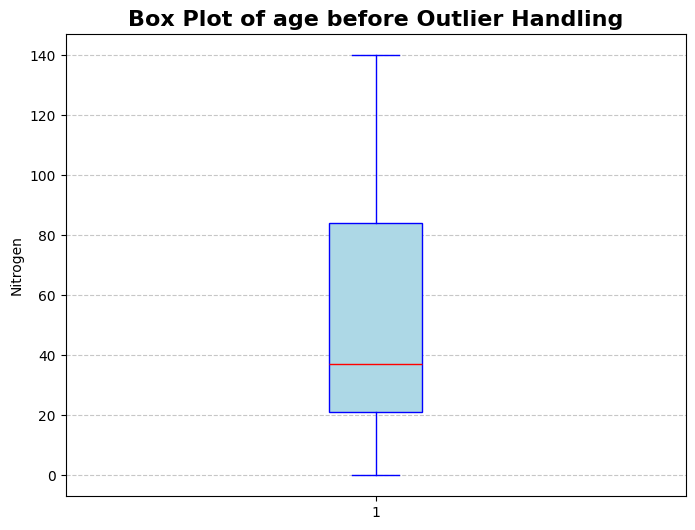

Phosphorous: 1.0107725431372674


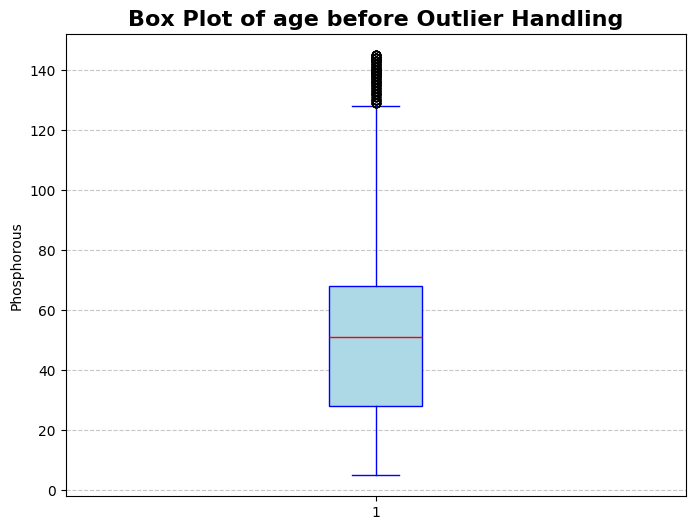

Potassium: 2.3751672388547


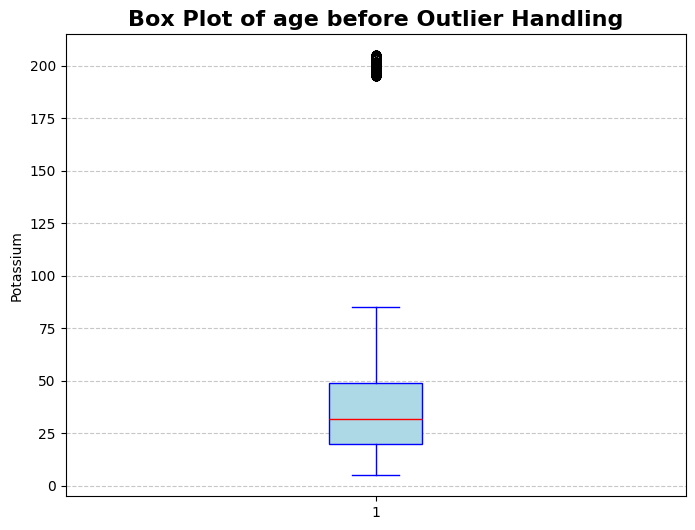

temperature: 0.18493273421137887


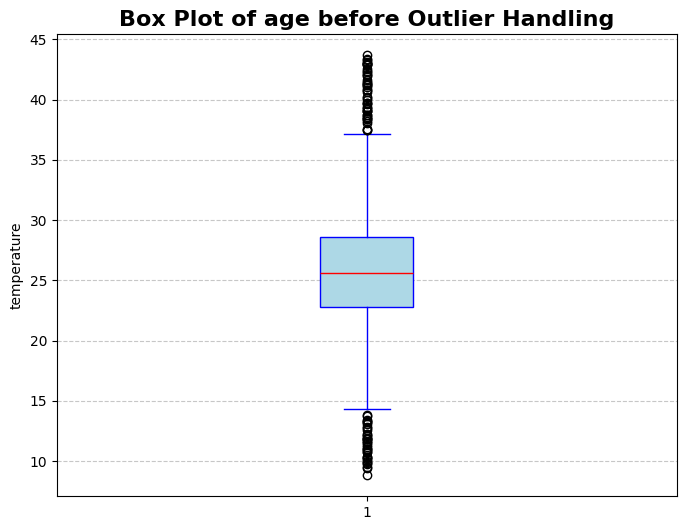

humidity: -1.0917079195808679


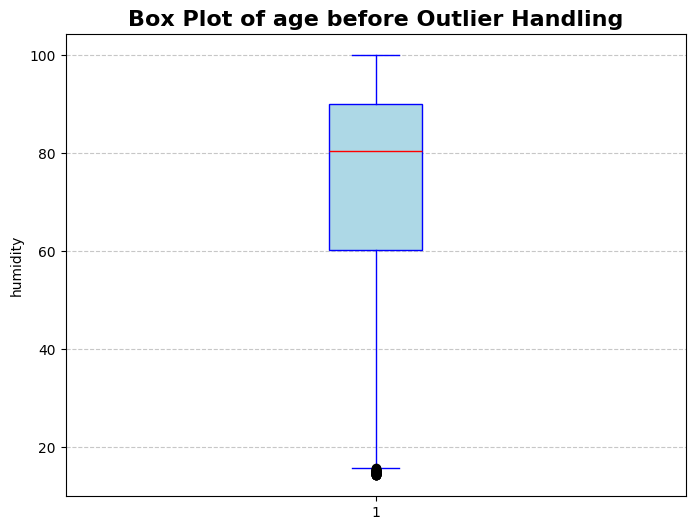

ph: 0.2839294375729441


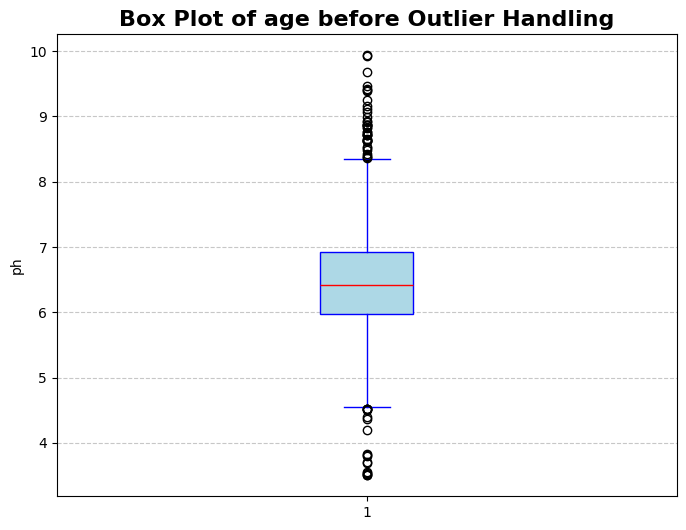

rainfall: 0.9657563536272812


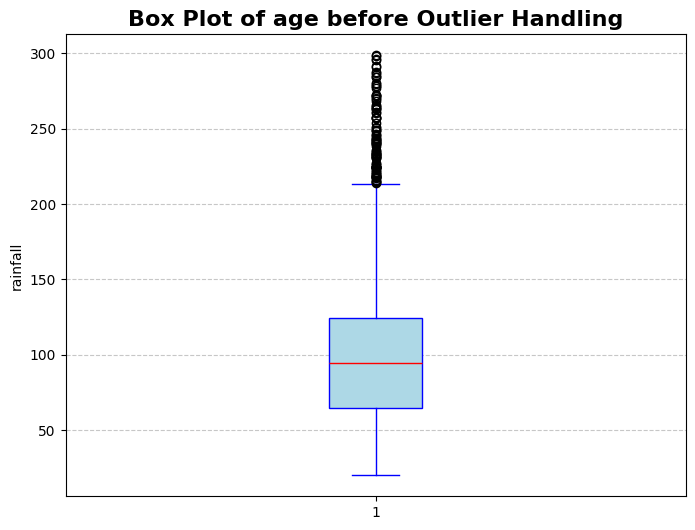

In [29]:
for column in df_new.columns.tolist():
    print(f"{column}: {df[column].skew()}")
    plt.figure(figsize = (8, 6), dpi = 100, facecolor = "white", edgecolor = "black")
    plt.boxplot(
        df[column],
        vert = True,
        patch_artist = True,
        boxprops=dict(facecolor="lightblue", color="blue"),
        medianprops=dict(color="red"),
        whiskerprops=dict(color="blue"),
        capprops=dict(color="blue")
    )
    plt.title("Box Plot of age before Outlier Handling", fontsize = 16, fontweight = "bold", color = "black")
    plt.ylabel(column)
    plt.grid(axis = "y", linestyle = "--", alpha = 0.7)
    plt.show()

In [30]:
for column in df_new.columns.tolist():
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = df[column].median()

Nitrogen: 0.5097213691539147


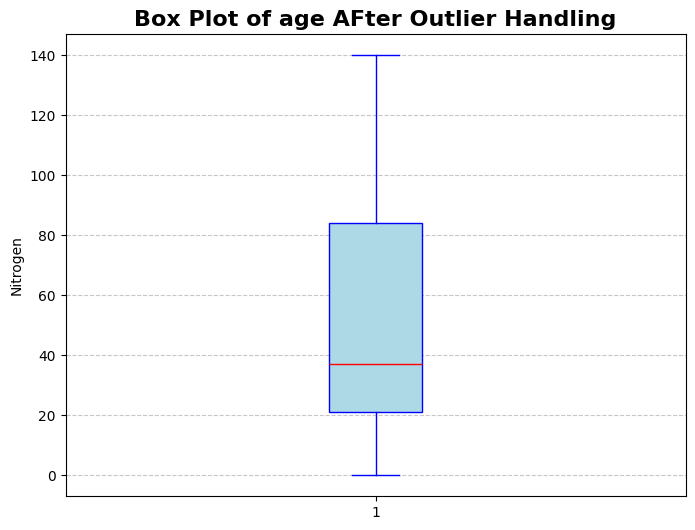

Phosphorous: 0.5416276272746203


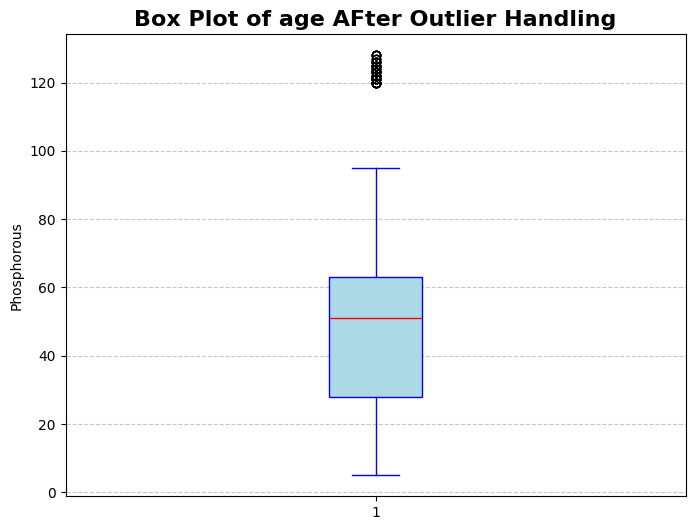

Potassium: 1.060436320835563


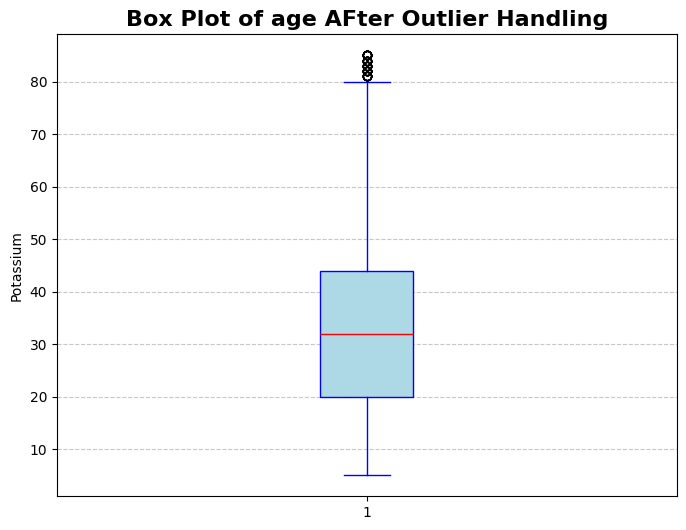

temperature: 0.029431334199612483


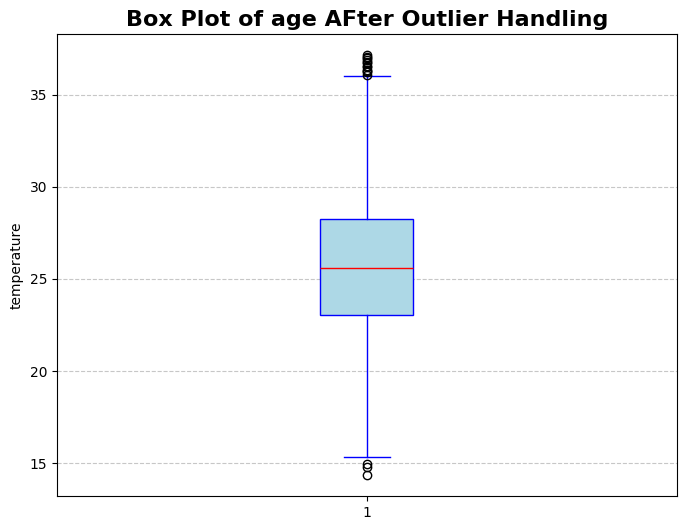

humidity: -1.1204570842825299


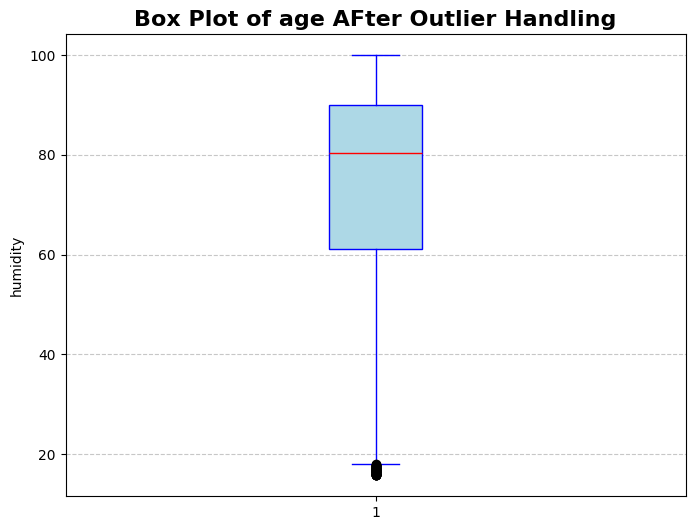

ph: 0.07033122281264265


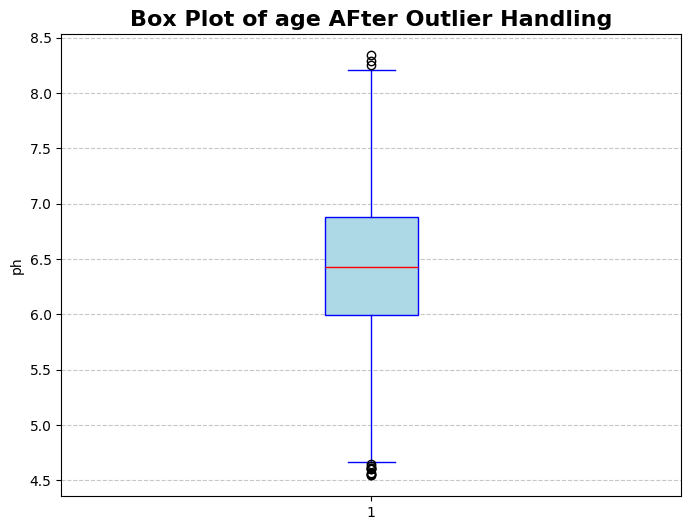

rainfall: 0.6395808897755971


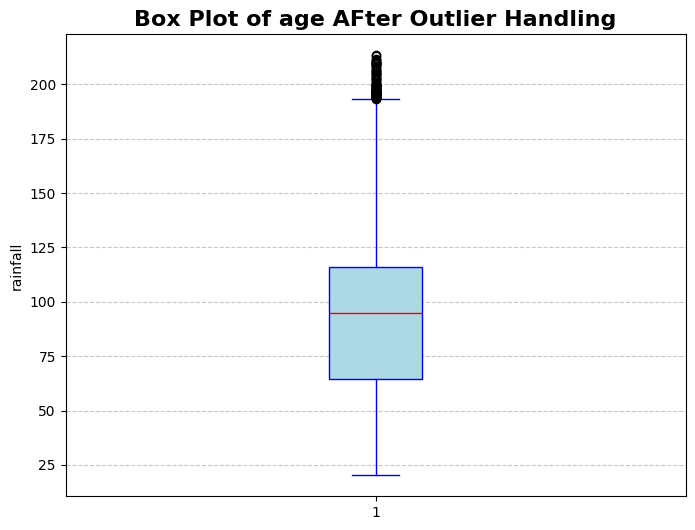

In [31]:
for column in df_new.columns.tolist():
    print(f"{column}: {df[column].skew()}")
    plt.figure(figsize = (8, 6), dpi = 100, facecolor = "white", edgecolor = "black")
    plt.boxplot(
        df[column],
        vert = True,
        patch_artist = True,
        boxprops=dict(facecolor="lightblue", color="blue"),
        medianprops=dict(color="red"),
        whiskerprops=dict(color="blue"),
        capprops=dict(color="blue")
    )
    plt.title("Box Plot of age AFter Outlier Handling", fontsize = 16, fontweight = "bold", color = "black")
    plt.ylabel(column)
    plt.grid(axis = "y", linestyle = "--", alpha = 0.7)
    plt.show()

#### **Feature Scaling and Encoding**


Machines understand numbers, not words or varying scales.

Scaling: Algorithms like KNN, SVM, and Neural Networks are sensitive to the scale of data (e.g., Rainfall is 0-300mm, pH is 0-14). You must normalize or standardize them so Rainfall doesn't dominate the calculation. Note: Tree-based models (Random Forest, XGBoost) are generally immune to this.

Encoding: You must convert text labels (e.g., "Rice", "Maize") into numbers using Label Encoding or One-Hot Encoding.

#### **Label Encoding**

In [36]:
encoder = LabelEncoder()
df["label"] = encoder.fit_transform(df["label"])

##### **Save the cleaned data set**

In [42]:
df.to_csv(r"C:\Users\Admin\OneDrive - United States International University (USIU)\Documents\USIU_A\FS2025\DSA3020VA\Crop\data\Crop_recommendation_encoded.csv", index=False)


In [39]:
model = LogisticRegression()

# Define K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
X = df.drop(columns = "label")
y = df["label"]

# Evaluate model with cross-validation
scores = cross_val_score(model, X, y, cv=kf, scoring="accuracy")

print("Cross-validation accuracies:", scores)
print("Mean Accuracy:", scores.mean())

Cross-validation accuracies: [0.90909091 0.95227273 0.92727273 0.93863636 0.93636364]
Mean Accuracy: 0.9327272727272726


In [40]:
print("Std Dev:", scores.std())

Std Dev: 0.01427301678918872


Model Training

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y, shuffle = True)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y, shuffle = True)

In [ ]:
model_train.fit(x_train, y_train)

In [ ]:
Y_pred = model_train.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, Y_pred)

Saving the Model

In [ ]:
joblib.dump(model_train, "classification_model.pkl")